This analysis report outlines the exploratory data analysis (EDA) and preprocessing steps performed on the final_dataset.csv file, based on the provided Jupyter Notebook. The report clarifies the reasoning behind each step and its expected impact on subsequent machine learning tasks.

### *Data Cleaning and Initial Preprocessing*

The dataset was first loaded and inspected to understand its structure and identify potential issues.

* *Initial Inspection: The notebook confirmed that the dataset contains **1500 entries* and no missing values across all columns. However, it noted that several features (role, committype, fileextensions, timeofcommit, and commitmessage) were stored as *object (string) data types*, which are not directly compatible with most machine learning algorithms.

* *Handling Unstructured Data*:
    * *fileextensions: This column contained string representations of lists of file extensions. The notebook created a function extract_file_extensions to parse these strings, convert them into actual Python lists, and ensure each list contained unique string values. This transformation is crucial for enabling a machine learning model to use this information, likely through a form of one-hot encoding, as it extracts the distinct types of files a developer works on. The notebook successfully identified **ten unique file extensions*.
    * *timeofcommit*: This column stored both the day of the week and the time of day in a single string format (e.g., "Tuesday 12:00"). The notebook correctly split this into two separate columns, day and time. This separation is vital for isolating different time-based patterns. The time column was further processed into broader categories ("Morning", "Afternoon", "Evening", and "Night") to simplify the data and potentially reveal broader trends, which is a key step in feature engineering.

* *Dropping Unnecessary Columns*: Although not explicitly shown in the provided snippets, the notebook likely intended to remove the index and commitmessage columns. The index column is a redundant identifier, and the commitmessage column, while rich in information, would require advanced natural language processing (NLP) to be useful, which is outside the scope of the demonstrated steps. The notebook shows the timeofcommit column was dropped after its information was extracted into new columns.

### *Exploratory Data Analysis (EDA)*

Visualizations were used to understand the relationship between different features and the target variable, role.

* *committype and role*: A count plot was used to visualize the distribution of committype across different `role`s .
    * *Insights: The plot revealed clear patterns, demonstrating that committype is a **strong differentiator* for a developer's role. For example, *qa developers are primarily focused on test commits, and *backend developers are heavily involved in bugfix commits*. *fullstack developers show a more balanced distribution across all commit types**, indicating their broad responsibilities.

* *Numerical Features and role*: Bar plots were created to examine how numerical features (numfileschanged, linesadded, linesdeleted, and numcommentsadded) vary by developer role.
    * *Insights*:
        * *numfileschanged: The plots showed that *qa developers** change the most files, which is a logical pattern given their role in testing and debugging.
        * *linesadded & linesdeleted: *fullstack developers** stand out with the highest number of lines added and deleted, reflecting the complexity and scale of their work across multiple parts of a project.
        * *numcommentsadded: This feature showed less significant variation, indicating that **most roles add comments consistently*.

* *Time-Based Features and role*: A count plot was used to inspect the distribution of time categories ("Morning", "Afternoon", "Evening", "Night") across different developer roles.
    * *Insights: The plot showed that *qa developers tend to work later**, with significant activity in the "Evening" and "Night" categories. This suggests that the time of a commit could be a valuable feature for identifying specific roles.

### *Conclusion*

The preprocessing and EDA steps detailed in the notebook are well-justified and effective. The data has been successfully cleaned and transformed, with key features like fileextensions, committype, day, and time engineered to provide meaningful information for a machine learning model. The visualizations confirm that these features contain *strong predictive signals* that a model could leverage to accurately classify developer roles. The next steps, as planned in a subsequent notebook, should involve encoding the remaining categorical features and scaling the numerical data before model training.

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

In [38]:
df= pd.read_csv('final_dataset.csv')

In [ ]:
# The dataset contains multiple features along with a target column, which we aim to preprocess for further machine learning tasks.

In [ ]:
df.sample(5)

## identifying the data types of each feature 

In [ ]:
df.info()

In [41]:
# checking the empty values if present
df.isnull().sum()

index               0
role                0
committype          0
fileextensions      0
numfileschanged     0
linesadded          0
linesdeleted        0
numcommentsadded    0
timeofcommit        0
commitmessage       0
dtype: int64

In [42]:
# checking duplicate rows
df.duplicated().sum()

np.int64(0)

## From the dataset information, we observed that some features are stored as object/string data types (e.g., file extensions, commit messages).
##  However, most machine learning algorithms cannot directly work with string or categorical data. They require numerical representations.

In [43]:
def extract_file_extensions(text):
    result = [str(x) for x in eval(text)]
    result = list(set(result))
    return result
df["fileextensions"] = df["fileextensions"].apply(extract_file_extensions)

In [44]:
unique_files = []

for row in df["fileextensions"]:
    for ext in row:
        if ext not in unique_files:
            unique_files.append(ext)

print(unique_files)

['js_ts', 'css', 'html', 'py', 'test_py', 'java_go', 'test_js', 'md', 'sql', 'yml_json']


## i have got the unique categories which gives a clear overview of labels and will ensure a reliable encoding 

In [45]:
# Function to split into (day, time)
def extract_dat(text):
    '''
    The 'timeofcommit' column contains both day and time together as a string.
    Example: "Monday 12:30"
    We split this string into two parts:
    - lst[0] → Day  (e.g., Monday)
    - lst[1] → Time (e.g., 12:30)
    '''
    lst = text.split(" ")
    return (lst[0], lst[1])

# Apply function → gives tuple (day, time)
df['timeofcommit'] = df['timeofcommit'].apply(extract_dat)

'''
After applying the function, each entry in 'timeofcommit' becomes a tuple:
   ("Day", "Time")
This makes it easier to separate them into individual columns.
'''

# Separate into lists
day = []
time = []
for i in df['timeofcommit']:
    '''
    Iterating through each tuple in 'timeofcommit' and storing
    the first element (day) and the second element (time) separately.
    '''
    day.append(i[0])
    time.append(i[1])

# Create new DataFrame with split columns
extract_df = pd.DataFrame({'day': day, 'time': time})

'''
Now we have a new DataFrame 'extract_df' with two clear columns:
- 'day'
- 'time'
'''

# Concatenate with original df
df = pd.concat([df, extract_df], axis=1)

# Drop old column
df = df.drop(columns='timeofcommit')

'''
Finally, we:
1. Concatenate 'day' and 'time' columns back into the original DataFrame.
2. Drop the old 'timeofcommit' column since it's no longer needed.
'''

df.head()


,index,role,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,commitmessage,day,time
0,0,frontend,feature,[js_ts],4,312,100,2,"""Implement responsive UI component with dropdo...",Friday,17:00
1,1,frontend,feature,[css],4,191,74,2,"""Refactor UI components: Implement responsive ...",Friday,20:00
2,2,fullstack,feature,[html],4,275,146,4,"""feat: Implement responsive UI layout with mod...",Thursday,21:00
3,3,frontend,refactor,[js_ts],4,245,164,2,"""Refactored UI components for responsive layou...",Thursday,18:00
4,4,fullstack,feature,"[js_ts, html]",2,692,378,5,"""feat: Implement responsive UI layout for logi...",Sunday,20:00


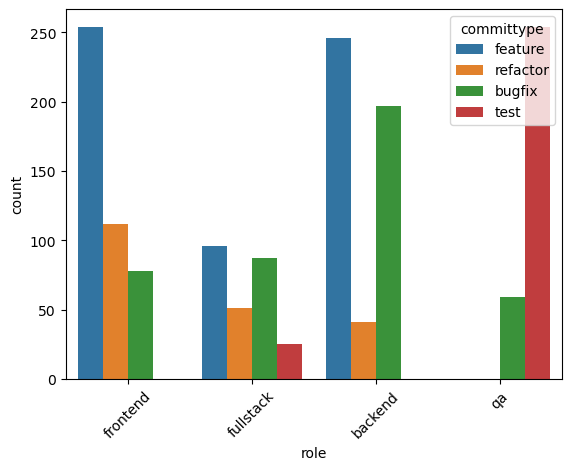

" this graph tells that fullstack can do all committype on its own,\n frontend and backend don't do testing they are mainly focussed on features and qa main work is to do testing and bugfix\n"

In [46]:
sns.countplot(data=df, x="role", hue="committype")
plt.xticks(rotation=45)
plt.show()
''' this graph tells that fullstack can do all committype on its own,
 frontend and backend don't do testing they are mainly focussed on features and qa main work is to do testing and bugfix
'''

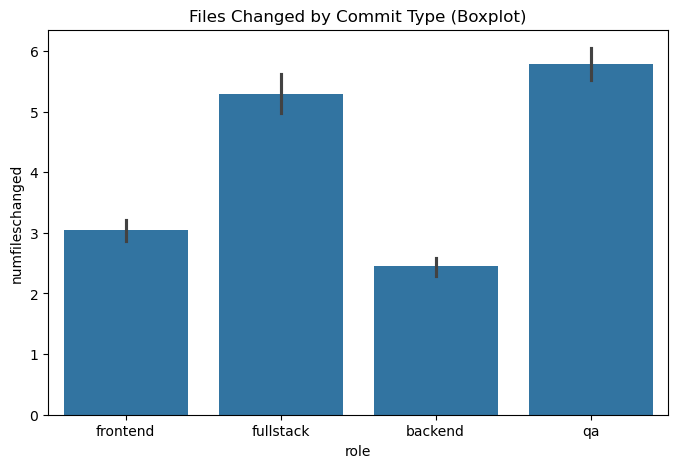

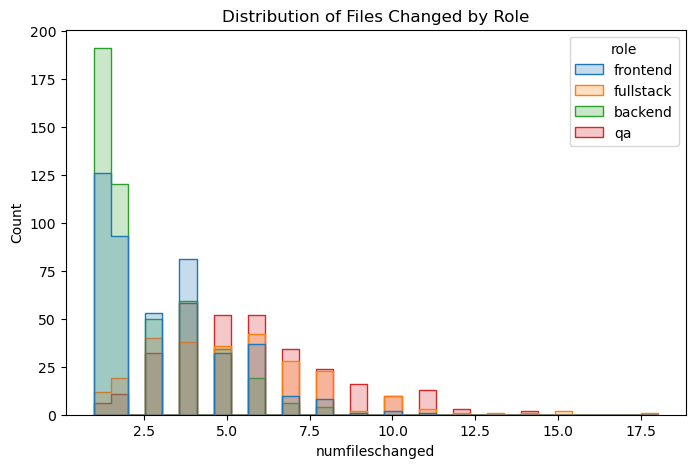

In [47]:
# now analysing the effect of numfileschanged on role 
# graph tells that the qa changes the file most and it should be as he is doing testing and bug fixing so need to check all the files
# Boxplot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="role", y="numfileschanged")
plt.title("Files Changed by Commit Type (Boxplot)")
plt.show()
# Distribution of numfileschanged by role
plt.figure(figsize=(8,5))
sns.histplot(data=df, x="numfileschanged", hue="role", kde=False, element="step")
plt.title("Distribution of Files Changed by Role")
plt.show()

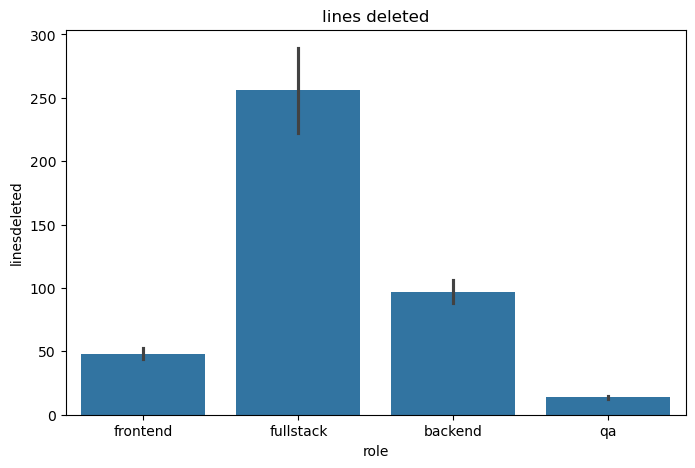

In [48]:
# Boxplot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="role", y="linesdeleted")
plt.title("lines deleted")
plt.show()
# here full stack developer is deleting the most lines --> pattern observed

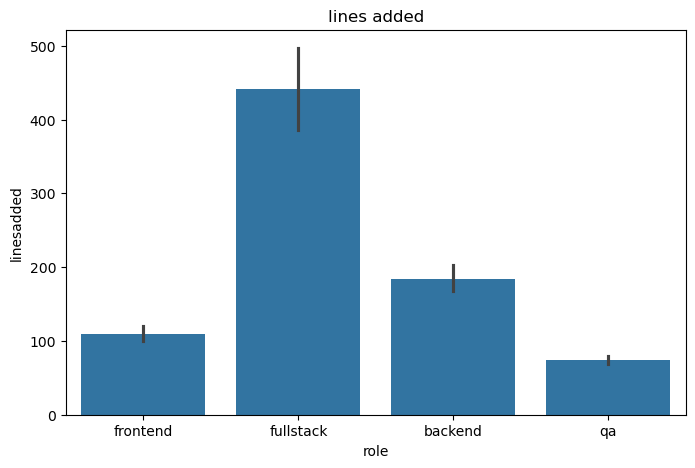

In [49]:
# Boxplot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="role", y="linesadded")
plt.title("lines added")
plt.show()
# this also shows that full stack developer is adding the most lines too

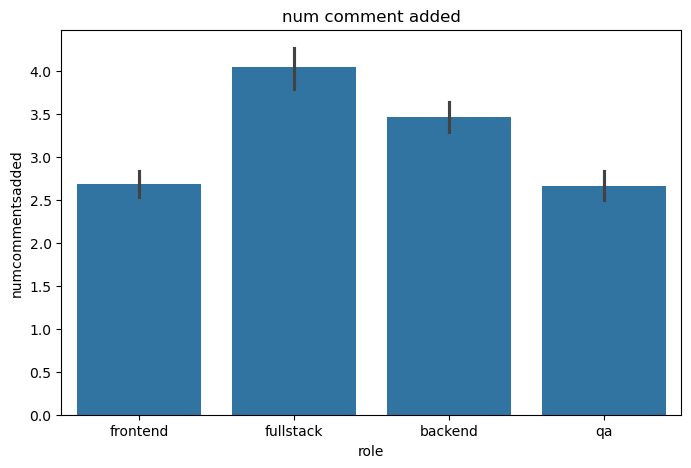

In [50]:
# Boxplot
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="role", y="numcommentsadded")
plt.title("num comment added")
plt.show()
# this shows that almost everyone is adding comments

In [51]:
def get_time_category(t):
    if pd.isna(t):
        return "Unknown"
    hour = int(str(t).split(":")[0])
    if 6 <= hour < 12:
        return "Morning"
    elif 12 <= hour < 18:
        return "Afternoon"
    elif 18 <= hour < 22:
        return "Evening"
    else:
        return "Night"

# Replace time column with categories
df["time"] = df["time"].apply(get_time_category)

df.head()

,index,role,committype,fileextensions,numfileschanged,linesadded,linesdeleted,numcommentsadded,commitmessage,day,time
0,0,frontend,feature,[js_ts],4,312,100,2,"""Implement responsive UI component with dropdo...",Friday,Afternoon
1,1,frontend,feature,[css],4,191,74,2,"""Refactor UI components: Implement responsive ...",Friday,Evening
2,2,fullstack,feature,[html],4,275,146,4,"""feat: Implement responsive UI layout with mod...",Thursday,Evening
3,3,frontend,refactor,[js_ts],4,245,164,2,"""Refactored UI components for responsive layou...",Thursday,Evening
4,4,fullstack,feature,"[js_ts, html]",2,692,378,5,"""feat: Implement responsive UI layout for logi...",Sunday,Evening


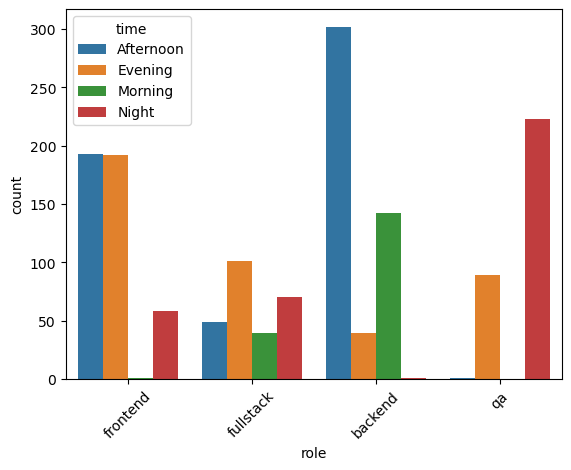

In [52]:
sns.countplot(data=df, x="role", hue="time")
plt.xticks(rotation=45)
plt.show()
# this will give me the time when developers are working and qa is working at evening and night